<a href="https://colab.research.google.com/github/antoniorendonc/DataSciencePortfolio/blob/main/Iris_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris Flower Classification with Decision Trees
@Antonio Rendon C.    2024

---

## Introduction

In this notebook, we will explore the classification of flowers using the famous **Iris dataset** with a **decision tree** model. The Iris dataset is a classic dataset in the field of machine learning and statistics, frequently used to demonstrate classification techniques.

## Dataset Description

The Iris dataset consists of 150 observations of iris flowers with the following features:

- **Sepal Length (cm)**: Sepal length in centimeters.
- **Sepal Width (cm)**: Sepal width in centimeters.
- **Petal Length (cm)**: Petal length in centimeters.
- **Petal Width (cm)**: Petal width in centimeters.
- **Species**: Type of flower, with three categories:
  - Iris setosa
  - Iris versicolor
  - Iris virginica

  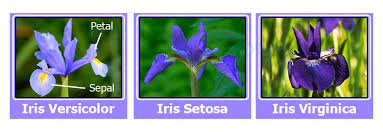

## Objective

The goal of this analysis is to build a decision tree model that can predict the species of an iris flower based on the measurements of its sepals and petals. We will evaluate the performance of the model using classification metrics and visualize the decision tree to interpret the generated rules.

## Analysis Steps

1. **Data Loading and Exploration**: Import the dataset and perform exploratory data analysis.
2. **Data Preparation**: Split the dataset into training and testing sets.
3. **Model Training**: Train a decision tree model using the training data.
4. **Model Evaluation**: Evaluate the model's performance using the test data.
5. **Decision Tree Visualization**: Visualize the decision tree to interpret the classification rules.
6. **Tree Pruning**: Prune the decision tree to avoid overfitting and improve model generalization.

## Libraries Used

- `pandas`: For data manipulation and analysis.
- `numpy`: For numerical operations.
- `matplotlib` and `seaborn`: For data visualization.
- `sklearn`: For machine learning algorithms and evaluation metrics.

## References

1. Ash. (2017, August 31). *ML from Scratch with IRIS!!* Kaggle. https://www.kaggle.com/code/ash316/ml-from-scratch-with-iris

2. GeeksforGeeks. (2024, May 15). *Iris Dataset*. GeeksforGeeks. https://www.geeksforgeeks.org/iris-dataset/

3. Iris species. (2016, September 27). *Kaggle*. https://www.kaggle.com/datasets/uciml/iris

4. The Iris Dataset. (n.d.). *Scikit-learn*. https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html


---
<br><br><br>

Let's begin the analysis!

Step 1: Data Loading and Exploration
First, we will load the Iris dataset and perform some exploratory data analysis (EDA) to understand its structure and contents.

In [2]:
# Import necessary libraries
import pandas as pd  # Library for data manipulation and analysis
import numpy as np  # Library for numerical operations and working with arrays
import seaborn as sns  # Visualization library based on matplotlib
import matplotlib.pyplot as plt  # Library for creating visualizations
from sklearn.datasets import load_iris  # Function to load the Iris dataset

# Load the Iris dataset
iris = load_iris()  # Loads the Iris dataset
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)  # Creates a DataFrame with feature names

# Rename the columns to more manageable names
iris_df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Add a new column 'species' to the DataFrame containing the numeric target values for each iris flower
iris_df['species'] = iris.target

# Map the numeric target values to their corresponding species names for better readability
species_map = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
iris_df['species'] = iris_df['species'].map(species_map)

# Display the first few rows of the DataFrame to verify the data loading and transformation
print(iris_df.head())


   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


Exploratory Data Analysis (EDA)
We will perform EDA to visualize the distribution of the features and understand the relationships between them.

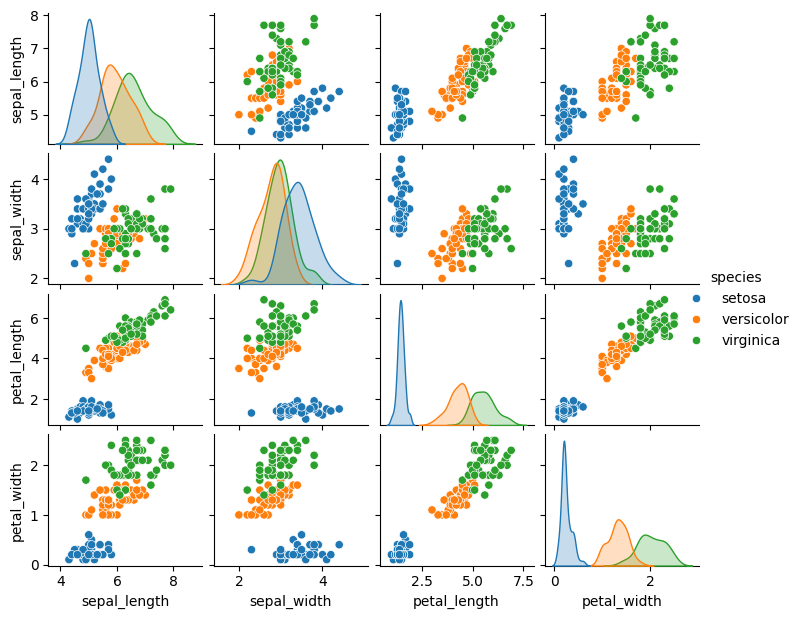

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [3]:
# Pairplot of the dataset with species color-coded
# This creates a grid of scatter plots to visualize the relationships between all pairs of features
sns.pairplot(iris_df, hue='species')  # 'hue' parameter is used to color the points based on the species

# Adjust the size of the plot for better visibility
plt.gcf().set_size_inches(8, 6)  # Set the size of the current figure (width, height) in inches
plt.show()  # Display the pairplot

# Summary statistics of the dataset
# This provides a statistical overview of the numerical columns in the DataFrame
print(iris_df.describe())  # Prints summary statistics like mean, standard deviation, min, max, and quartiles


Step 2: Data Preparation
We will split the dataset into training and testing sets to evaluate the model's performance.

In [4]:
from sklearn.model_selection import train_test_split  # Import the function to split the dataset

# Define features (X) by dropping the 'species' column and target (y) as the 'species' column
X = iris_df.drop('species', axis=1)  # Features: all columns except 'species'
y = iris_df['species']  # Target: the 'species' column

# Split the dataset into training and testing sets with 30% of the data for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# random_state ensures reproducibility of the split

# Calculate sizes and percentages of training and testing sets
train_size = X_train.shape[0]
test_size = X_test.shape[0]
total_size = train_size + test_size
train_percentage = (train_size / total_size) * 100
test_percentage = (test_size / total_size) * 100

# Print the size and percentage of the training and testing sets
print(f'Training set size: {train_size} samples ({train_percentage:.2f}%)')  # Displays the number of samples and percentage in the training set
print(f'Testing set size: {test_size} samples ({test_percentage:.2f}%)')  # Displays the number of samples and percentage in the testing set


Training set size: 105 samples (70.00%)
Testing set size: 45 samples (30.00%)


Step 3: Model Training
We will train a decision tree classifier using the training data.

In [5]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the DecisionTreeClassifier with a fixed random state for reproducibility
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier using the training data (features: X_train, labels: y_train)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

Step 4: Model Evaluation
We will evaluate the model's performance using the test data and various classification metrics.

In [ ]:
# Predict probabilities
probabilities = clf.predict_proba(X_test)

# Display the first few probabilities
probabilities_df = pd.DataFrame(probabilities, columns=clf.classes_)
probabilities_df['True Class'] = y_test.reset_index(drop=True)
print(probabilities_df.head())



   setosa  versicolor  virginica  True Class
0     0.0         1.0        0.0  versicolor
1     1.0         0.0        0.0      setosa
2     0.0         0.0        1.0   virginica
3     0.0         1.0        0.0  versicolor
4     0.0         1.0        0.0  versicolor


In [ ]:
# Make predictions
predictions = clf.predict(X_test)

# Combine predictions with the actual class labels
results_df = pd.DataFrame({'True Class': y_test, 'Predicted Class': predictions})

# Display the first few predictions
print(results_df.head())

     True Class Predicted Class
73   versicolor      versicolor
18       setosa          setosa
118   virginica       virginica
78   versicolor      versicolor
76   versicolor      versicolor


In [ ]:
# Interpret the results
correct_predictions = (results_df['True Class'] == results_df['Predicted Class']).sum()
total_predictions = results_df.shape[0]
accuracy = correct_predictions / total_predictions

print(f'Correct Predictions: {correct_predictions}')
print(f'Total Predictions: {total_predictions}')
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print("Classification Report:\n", classification_report(y_test, predictions))

# Print accuracy score
print("Accuracy Score:", accuracy_score(y_test, predictions))

Correct Predictions: 45
Total Predictions: 45
Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Accuracy Score: 1.0


Step 5: Decision Tree Visualization
We will visualize the decision tree to interpret the rules generated by the model.

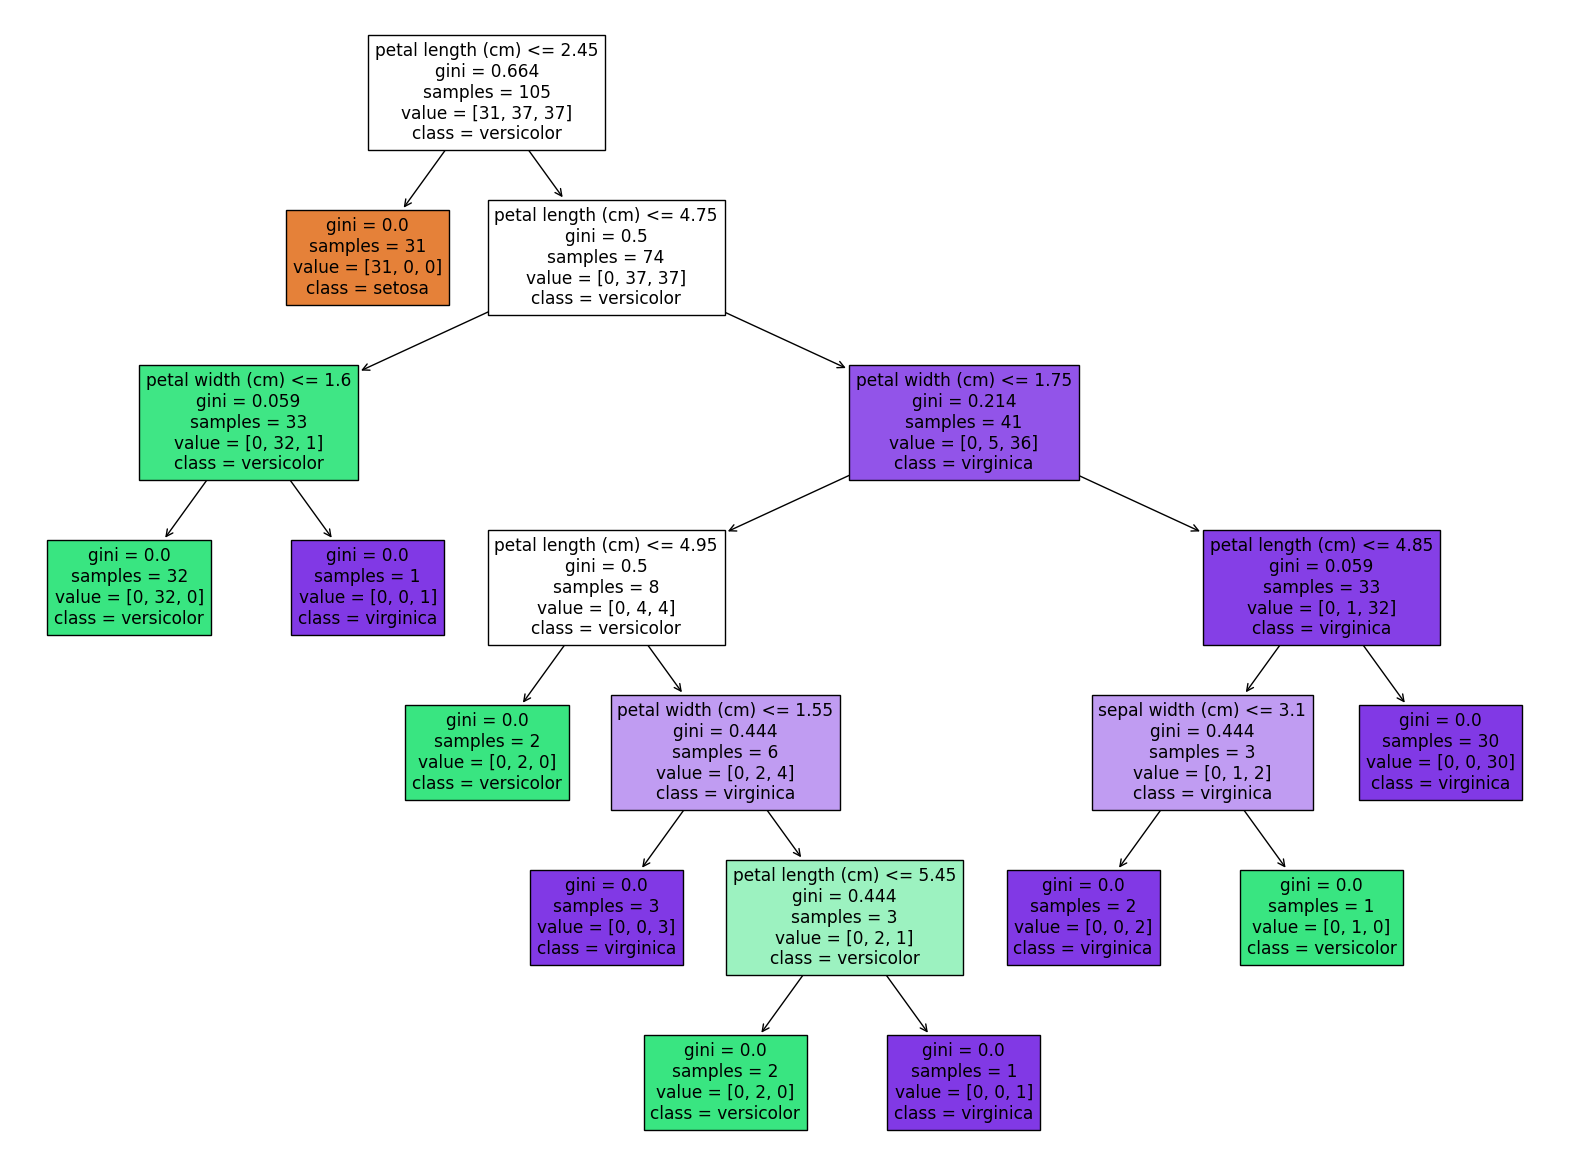

In [9]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(20, 15))  # Set the size of the figure for better visualization
plot_tree(clf,
          feature_names=iris.feature_names,  # Names of the features (attributes) in the dataset
          class_names=list(species_map.values()),  # Names of the classes (species) in the dataset
          filled=True)  # Color the nodes to show the class distribution
plt.show()  # Display the plot

Step 6: Tree Pruning
To avoid overfitting, we will prune the decision tree and select the optimal number of leaves.

Best number of leaf nodes: 4
Classification Report (Pruned Tree):
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



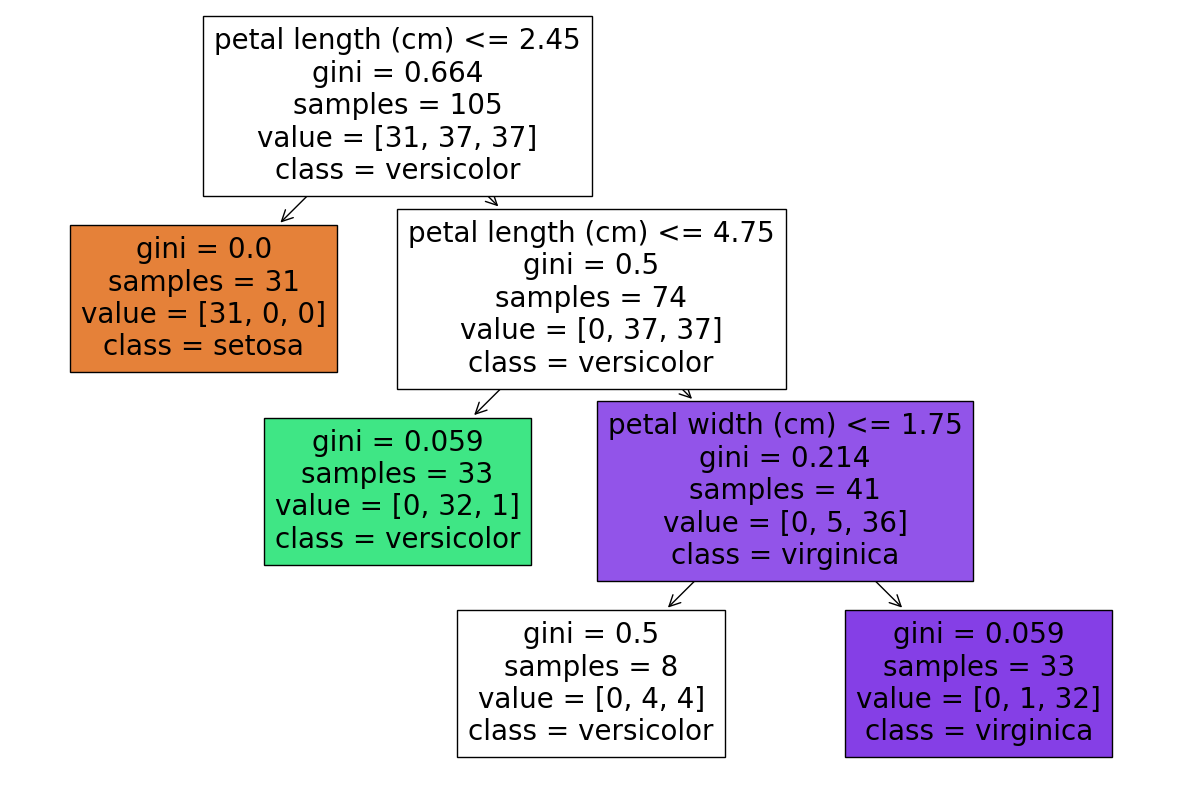

In [10]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'max_leaf_nodes': range(2, 20)}

# Initialize GridSearchCV with DecisionTreeClassifier
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best model
best_clf = grid_search.best_estimator_

# Print the best number of leaf nodes
print(f'Best number of leaf nodes: {grid_search.best_params_["max_leaf_nodes"]}')

# Make predictions with the pruned tree
y_pred_pruned = best_clf.predict(X_test)

# Print classification report for the pruned tree
print("Classification Report (Pruned Tree):\n", classification_report(y_test, y_pred_pruned))

# Plot the pruned decision tree
plt.figure(figsize=(15, 10))
plot_tree(best_clf, feature_names=iris.feature_names, class_names=list(species_map.values()), filled=True)
plt.show()


This completes the analysis of the Iris dataset using a decision tree classifier. You have performed data loading, exploration, preparation, model training, evaluation, visualization, and pruning to ensure the model generalizes well to new data.